In [1]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt

# Implementando PCA manualmente

https://towardsdatascience.com/a-step-by-step-implementation-of-principal-component-analysis-5520cc6cd598

O PCA - Principal Component Analysis - é um algoritmo de redução de dimensionalidade. Esse algoritmo procura um conjunto de eixos, conhecidos como `principal components` cuja as projeções dos datapoints neles possuem máxima dispersão (variância). Na prática, o PCA encontra os componentes principais e realiza uma mudança de base, de modo que as coordenadas dos pontos serão dados em relação a esse novo conjunto de eixos.

Primeiramente o PCA calcula a matriz de covariância e em seguida calcula os autovalores e autovetores dela. Os autovetores da matriz de covâriancia representam a nova base que utilizaremos para representar as observações do conjunto de dados, isso é, as novas coordenadas dos pontos (representados agora por um número menor de features) serão dados pelas suas projeções nos autovetores associados ao $k$ maiores autovalores.

Se o conjunto de dados possui dimensionalidade $n$ (dataset com $n$ colunas), nós podemos diminuir o número de dimensões para $k$ (com $k<n$), para isso precisamos selecionar os $k$ autovetores associados aos $k$ maiores autovalores $\lambda$.

**Passo 1: Criando os dados aleatórios**

In [2]:
# vamos criar um conjunto de dados com 2 features extraidas de uma distribuicao normal
mu  = np.array([10, 13])                    # valor medio das features
cov = np.array([[3.5, -1.8], [-1.8, 3.5]])  # matriz de covariancia das features

print('mu = {}'.format(mu.shape))
print('cov = {}'.format(cov.shape))

org_data = rnd.multivariate_normal(mu, cov, size=(1000))

mu = (2,)
cov = (2, 2)


In [3]:
org_data

array([[ 7.22797105, 14.80619816],
       [10.43111246, 13.93304512],
       [10.25873935, 14.10557516],
       ...,
       [ 8.83710048, 12.67427219],
       [ 9.55257742, 13.74302827],
       [ 6.4039627 , 15.49623281]])

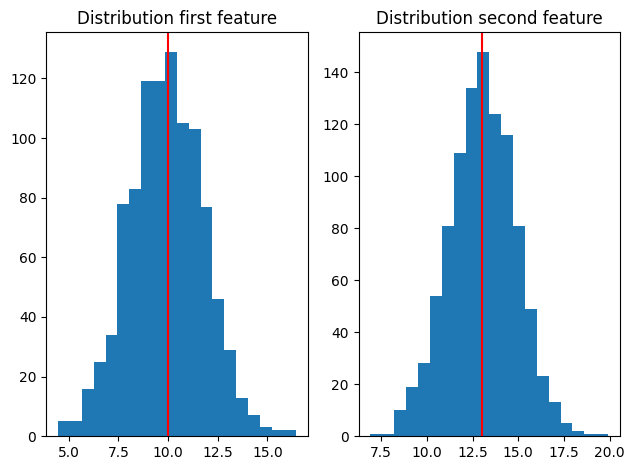

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.hist(org_data[:, 0], bins=20)
ax1.axvline(mu[0], c='r');
ax1.set_title('Distribution first feature')

ax2.hist(org_data[:, 1], bins=20)
ax2.axvline(mu[1], c='r')
ax2.set_title('Distribution second feature')

fig.tight_layout()

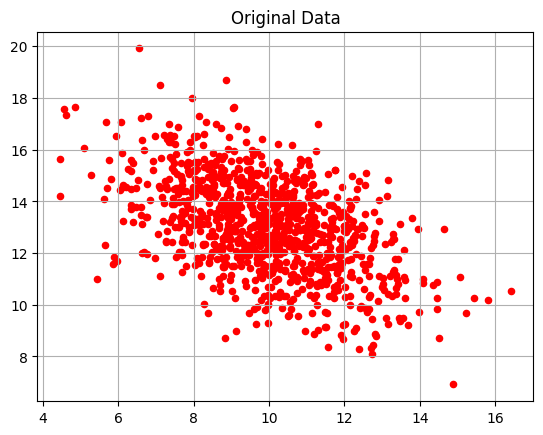

In [5]:
plt.scatter(x=org_data[:, 0], y=org_data[:, 1], c='r', s=20)
plt.grid()
plt.title('Original Data');

**Passo 2: centralizando e normalizando (standardizing) os dados**

https://stats.stackexchange.com/questions/53/pca-on-correlation-or-covariance

Para aplicar o PCA precisamos que todos os dados estejam centrados na origem.

In [6]:
mean = np.mean(org_data, axis=0)
sigma = org_data.std(axis=0)

centralized_data = ( org_data - mean )

In [7]:
centralized_data

array([[-2.68901677,  1.77277937],
       [ 0.51412464,  0.89962632],
       [ 0.34175153,  1.07215637],
       ...,
       [-1.07988734, -0.3591466 ],
       [-0.36441039,  0.70960948],
       [-3.51302512,  2.46281401]])

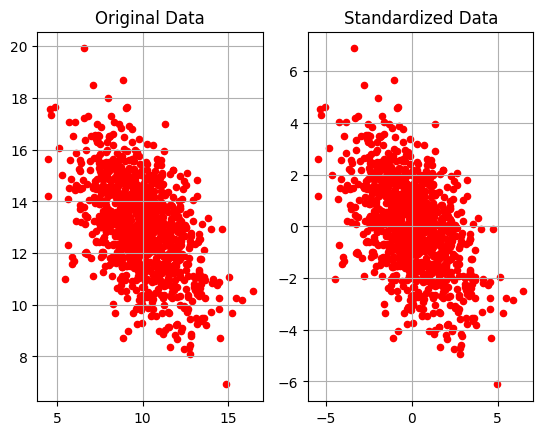

In [9]:
fig, axes = plt.subplots(1, 2)

ax1, ax2 = axes.ravel()

ax1.scatter(x=org_data[:, 0], y=org_data[:, 1], c='r', s=20)
ax1.set_title('Original Data')
ax1.grid()

ax2.scatter(x=centralized_data[:, 0], y=centralized_data[:, 1], c='r', s=20)
ax2.set_title('Standardized Data')

ax2.grid()

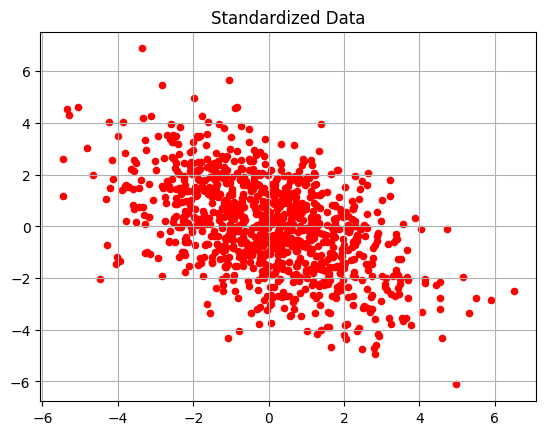

In [10]:
plt.scatter(x=centralized_data[:, 0], y=centralized_data[:, 1], c='r', s=20)
plt.grid()
plt.title('Standardized Data');

**Passo 3: calculando a matriz de covariância**

In [11]:
# valor inicial usado para gerar os dados
cov

array([[ 3.5, -1.8],
       [-1.8,  3.5]])

In [12]:
# matriz calculado usando os dados aleatorios
np.cov(org_data.T)

array([[ 3.48232103, -1.71332985],
       [-1.71332985,  3.3529071 ]])

In [14]:
# matriz de covariancia dos dados normalizados
covariance_matrix = np.round( np.cov(centralized_data.T), 2 )
covariance_matrix

array([[ 3.48, -1.71],
       [-1.71,  3.35]])

**Passo 4: calculando os autovalores e autovetores da matriz de covariância**

Cada autovetor representa uma direção cuja as novas coordenadas dos pontos serão dadas pela projeção. O autovetor correspondente ao maior autovalor nos dará a direção de máxima variância, o qual é denomidado por **primeira componente principal** (first principal component); o autovetor correspondente ao segundo maior autovalor é denomidade **segunda componente principal** e nós dará a direção com a segunda maior variância, e assim por diante.

In [15]:
eig_val, eig_vec = np.linalg.eig(covariance_matrix)

In [16]:
# eigenvalues
eig_val

array([5.12623493, 1.70376507])

In [17]:
# eigenvectors - as colunas são os autovetores da matriz de covariância
eig_vec

array([[ 0.72041109,  0.69354731],
       [-0.69354731,  0.72041109]])

In [18]:
e1 = eig_vec[:, 0]
e1

array([ 0.72041109, -0.69354731])

Nesse caso os autovalores (guardados na variável `eig_val`) já estão ordenados na em ordem descrescente, de modo que as colunas $\vec{v}_1$ e $\vec{v}_2$ dadas por `eig_vec[:, 0]` e `eig_vec[:, 1]` já representam a primeira componente principal e a segunda componente principal. No entanto, nem sempre os autovalores obtidos via `np.linalg.eig()` estarão em ordem decrescente logo de cara, de forma que precisamos garantir que de fato e eles estejam e reordenar as colunas da matriz de autovetores para elas representarem a ordem das componentes principais.

In [19]:
# ordena os autovalores e autovetores correspondentes em ordem decrescente
indices = np.arange(0, eig_val.shape[0])
indices = ([i for _, i in sorted(zip(eig_val, indices))])[::-1]

eig_val = eig_val[indices]
eig_vec = eig_vec[:, indices]

print('Sorted eigenvalues: {}\n'.format(eig_val))
print('Sorted eigenvectors: \n{}'.format(eig_vec))

Sorted eigenvalues: [5.12623493 1.70376507]

Sorted eigenvectors: 
[[ 0.72041109  0.69354731]
 [-0.69354731  0.72041109]]


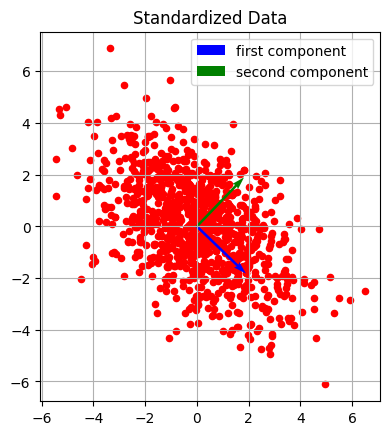

In [21]:
# scatter plot dos dados normalizados
plt.scatter(x=centralized_data[:, 0], y=centralized_data[:, 1], c='r', s=20)

# plot dos autovetores
# plt.quiver(x, y, u, v) - (x, y) posicao inicial, (u, v) posicao final
plt.quiver(0,0, *eig_vec[:, 0], scale=5, angles='xy', color='blue',  label='first component')
plt.quiver(0,0, *eig_vec[:, 1], scale=5, angles='xy', color='green', label='second component')

plt.grid()
plt.legend()

# aplica a mesma escala aos eixos x e y (importante para dar o aspecto visual de ortogonalidade ao vetores)
plt.gca().set_aspect('equal')

plt.title('Standardized Data');

**Passo 5: calculando a variância explicada e selecionada k componentes**

O quanto cada componente principal consegue explicar fenômeno (variância das projeções ao longo da direção) é dada pelo autovalor $\lambda$ associado a cada direção.

In [22]:
explained_variance = eig_val / np.sum(eig_val)
print('Explained Variance: {}'.format(explained_variance))

cumulative_variance = np.cumsum(explained_variance)
print('Cumulative Variance: {}'.format(cumulative_variance))

Explained Variance: [0.75054684 0.24945316]
Cumulative Variance: [0.75054684 1.        ]


Vemos que variância ao longo da direção da **primeira componente principal** $\vec{v}_{1}$ é capaz de explicar $75\%$ da variância do fenômeno, enquanto a **segunda componente principal** $\vec{v}_{2}$ captura os $25\%$ restantes. Na prática quando estamos lidando com um conjunto de dados com um número muito elevado de dimensões, geralmente escolhemos as $k$ primeiras componentes que resultam em uma variância explicada de $95\%$.

$k_{best} = \min{(k)} \mid \left( \sum_{i}^{k} \lambda_{i} \;\;/\;\; \sum_{i}^{N} \lambda_{i} \right) > 95\%$

**Passo 6: Projetando as observações na base de autovetores**

Vamos agora projetar as observações no novo conjunto de eixos.

$X_{pca} = XV$

In [23]:
pca_data = np.dot( centralized_data, eig_vec )
pca_data

array([[-3.16670385, -0.58783043],
       [-0.25355232,  1.00467054],
       [-0.49738957,  1.00941419],
       ...,
       [-0.52887765, -1.00768615],
       [-0.75467303,  0.25847469],
       [-4.23890027, -0.66221059]])

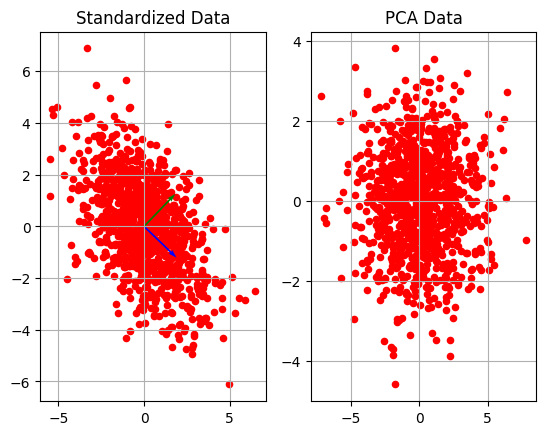

In [30]:
fig, axes = plt.subplots(1, 2)

ax1, ax2 = axes.ravel()

ax1.scatter(x=centralized_data[:, 0], y=centralized_data[:, 1], c='r', s=20)
ax1.set_title('Standardized Data')
ax1.quiver(0,0, *eig_vec[:, 0], scale=5, angles='uv', color='blue',  label='first component')
ax1.quiver(0,0, *eig_vec[:, 1], scale=5, angles='uv', color='green', label='second component')
ax1.grid()


ax2.scatter(x=pca_data[:, 0], y=pca_data[:, 1], c='r', s=20)
ax2.set_title('PCA Data')
ax2.grid()

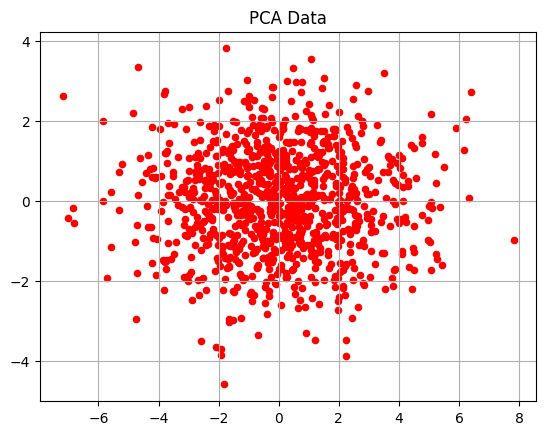

In [31]:
plt.scatter(x=pca_data[:, 0], y=pca_data[:, 1], c='r', s=20)
plt.grid()
plt.title('PCA Data');

**Passo 7: Invertendo o PCA e reconstruindo os dados originais**

A matriz de dados $X$ utilizada para o PCA foi resultada da matriz original subtraída da média de cada coluna / feature:

$X = X_{org} - \bar{X} \;\;\Rightarrow\;\; X_{org} = X + \bar{X}$

No passo anterior, projetamos as observações centradadas na origem (linhas da matriz $X$) na direção dos autovalores $v_{i}$ dadas pelas colunas da matriz $V$, e obtemos as coordenadas desses pontos na base formada pelas componentes principais (linhas matriz $X_{pca}$).

$X_{pca} = XV$

Se quisermos obter os dados originais $X_{org}$ a partir dos dados transformados $X_{pca}$, devemos multiplicar a matriz $X_{pca}$ pela transposta $V^{T}$ da matriz de autovetores $V$ e somar novamente as médias subtraídas anteriormente. De fato, temos que:

$X_{new} = X_{pca} V^{T} + \bar{X}$

$X_{new} = (XV) V^{T} + \bar{X}$

$X_{new} = X (VV^{T}) + \bar{X} \;\;\;\;\;\;\;\;\;\;\;\;\; (VV^{T})=I \;\text{(Matriz Ortogonal)}$

$X_{new} = XI + \bar{X}$

$X_{new} = X + \bar{X}$

$\therefore X_{new} = X_{org}$

In [33]:
new_data = np.dot( pca_data, eig_vec.T ) + mean
new_data

array([[ 7.22797105, 14.80619816],
       [10.43111246, 13.93304512],
       [10.25873935, 14.10557516],
       ...,
       [ 8.83710048, 12.67427219],
       [ 9.55257742, 13.74302827],
       [ 6.4039627 , 15.49623281]])

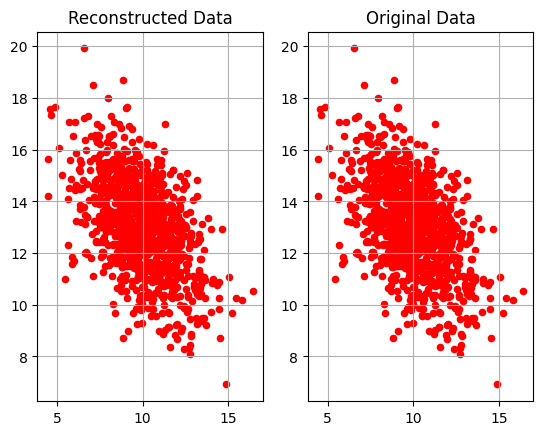

In [35]:
fig, axes = plt.subplots(1, 2)

ax1, ax2 = axes.ravel()

ax1.scatter(x=new_data[:, 0], y=new_data[:, 1], c='r', s=20)
ax1.set_title('Reconstructed Data')
ax1.grid()

ax2.scatter(x=org_data[:, 0], y=org_data[:, 1], c='r', s=20)
ax2.set_title('Original Data')

ax2.grid()

In [36]:
loss = np.mean(np.square(new_data - org_data))

print('Reconstruction Loss = {}'.format(loss))

Reconstruction Loss = 1.1438483125704672e-32


# Implementando PCA pelo sklearn

https://stackabuse.com/implementing-pca-in-python-with-scikit-learn/

In [37]:
import pandas as pd

from sklearn.datasets import load_iris

In [73]:
data = load_iris(as_frame=True)
dataset = data.get('data')

dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [84]:
data.get('target').unique()

array([0, 1, 2])

In [74]:
data.get('target_names')

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [80]:
target_names = data.get('target_names')
classes = dict(enumerate(target_names))

dataset['class'] = data.get('target').map(classes)

dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
